In [2]:
import numpy as np
import scipy as sp 
from DCBC.dcbc import compute_DCBC 
import DCBC.utilities as ut
import Functional_Fusion.atlas_map as am
import pandas as pd

In [4]:
atlas, _ = am.get_atlas('MNISymThalamus1')

coords = atlas.world.T #Nx3 shaoe

print(coords.shape)

dist = ut.compute_dist(coords,1.5, backend='numpy')

print(dist.shape)



(25640, 3)
(25640, 25640)


In [ ]:
#loading data 
#MDTB - {s}_space-{atlas.name}_ses-s1_CondRun.dscalar.nii
#Language - {s}_space-{atlas.name}_ses-localizerfm_CondRun.dscalar.nii
#MDTB-high-res - {s}_space-{atlas.name}_ses-s1_CondRun.dscalar.nii

data_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion_new/Social'

# Read the participant tsv file to get the name of the available subjects
subj_info = pd.read_csv(f'{data_dir}/participants.tsv',sep='\t')
#subj_info = subj_info[subj_info['participant_id'] != 'sub-12']


data = []
# Read the data for each subject
for i, s in enumerate(subj_info['participant_id']):
        file_name = f'{data_dir}/derivatives/ffextract/{s}/{s}_space-{atlas.name}_ses-s1_CondRun.dscalar.nii'
        datafile = nb.load(file_name)
        data.append(datafile.get_fdata())
# make the numsubj x numcond (16 repetitions x 9 conditions) x numvoxel tensor
data = np.stack(data)
data.shape

np.save(f"{wk_dir}/indiv_parcellations/MDTB-ses1/MDTB_ses1_data.npy", data)

In [15]:
base_dir = "/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/atlases/thalamus"

parcellation = np.load(f"{base_dir}/Prob_thalamus.npy")

#shape is (32, 25640)

func = np.load(f"{base_dir}/indiv_parcellations/MDTB-ses1/MDTB_ses2_data.npy")



In [22]:
func[0].T.shape

parcellation.shape

(32, 25640)

In [29]:
func.shape

parcellation = np.load(f"{base_dir}/Prob_thalamus.npy")

comb_hemispheres = parcellation[0:16] + parcellation[16:32]

wta = np.argmax(comb_hemispheres, axis=0) + 1

wta_int32 = wta.astype(np.int32)

print(wta_int32.shape)

np.nanmax(wta_int32)

(25640,)


16

In [30]:
wcorr_array, bcorr_array, dcbc_array = np.array([]), np.array([]), np.array([])

for sub in range(func.shape[0]):
    print(f"Subject {sub+1}...")

    data = func[sub].T

    R = compute_DCBC(maxDist=60, binWidth=1.5, parcellation=wta_int32,
                    func=data, dist=dist, weighting=True, backend='numpy')
    
    wcorr_array = np.append(wcorr_array, R['corr_within'])
    bcorr_array = np.append(bcorr_array, R['corr_between'])
    dcbc_array = np.append(dcbc_array, R['DCBC'])





Subject 1...
Subject 2...
Subject 3...
Subject 4...
Subject 5...
Subject 6...
Subject 7...
Subject 8...
Subject 9...
Subject 10...
Subject 11...
Subject 12...
Subject 13...
Subject 14...
Subject 15...
Subject 16...
Subject 17...
Subject 18...
Subject 19...
Subject 20...
Subject 21...
Subject 22...
Subject 23...
Subject 24...


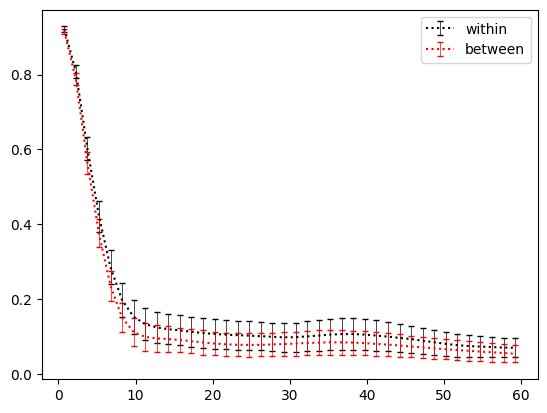

[0.04813801 0.02984719 0.01881444 0.01523087 0.02573842 0.01532947
 0.01360031 0.02708958 0.01861435 0.0190033  0.03489901 0.02582492
 0.03670491 0.03190948 0.01869279 0.022241   0.00893105 0.01404852
 0.02852477 0.03465574 0.03273843 0.01911805 0.01504702 0.01928397]


In [31]:
returnsubj = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

ut.plot_single(within=wcorr_array, between=bcorr_array, maxDist=60, binWidth=1.5,
               
                subjects=returnsubj, within_color='k', between_color='r')

print(dcbc_array)

In [59]:
print(dist[6])

n_nans = np.isnan(dist).sum()

print("Number of NaNs in dist:", n_nans)

prop_nans = np.isnan(dist).mean()
print(f"Proportion of NaNs: {prop_nans:.6f}")

[ 4.74341649  6.18465844  7.64852927 ... 88.60163655 88.74119675
 88.90584908]
Number of NaNs in dist: 0
Proportion of NaNs: 0.000000
